# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Face detection
Task is to predict the boundaries(mask) around the face in a given image.

## Dataset
Faces in images marked with bounding boxes. Have around 500 images with around 1100 faces manually tagged via bounding box.

### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Change current working directory to project folder (1 mark)

In [0]:
import os
#### Add your code here ####
# The path to the input data file has been directly fed in the next step

### Load the "images.npy" file (4 marks)
- This file contains images with details of bounding boxes

In [0]:
!ls

drive  sample_data


In [0]:
import numpy as np
#### Add your code here ####
data = np.load('/content/drive/My Drive/Colab Notebooks/Project - Computer Vision/Data_Subset/images.npy', allow_pickle = True)

### Check one sample from the loaded "images.npy" file  (4 marks)

In [0]:
#### Add your code here ####
print(data.shape)
print(data[10])

(409, 2)
[array([[[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [5, 5, 5],
        [6, 6, 6],
        [6, 6, 6]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [5, 5, 5],
        [6, 6, 6],
        [6, 6, 6]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [5, 5, 5],
        [5, 5, 5],
        [5, 5, 5]]], dtype=uint8)
 list([{'label': ['Face'], 'notes': '', 'points': [{'x': 0.48, 'y': 0.10385756676557864}, {'x': 0.7716666666666666, 'y': 0.6795252225519288}], 'imageWidth': 600, 'imageHeight': 337}])]


### I have printed one row of the data in images.npy file. I could infer the following from the output.
 1. Image size is 600 * 337 with 3 channels
 2. The pixel values are saved in one column as an array
 3. The bounding box values and label are saved in the second column.
 4. For the row printed, there is a face in the picture and the bounding box co-ordinates and the label are given in the 2nd column.


### Set image dimensions   (2 marks)
- Initialize image height, image width with value: 224 

In [0]:
#### Add your code here ####
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224

### Create features and labels
- Here feature is the image
- The label is the mask
- Images will be stored in "X_train" array
- Masks will be stored in "masks" array

In [0]:
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input

masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X_train = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    X_train[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        masks[index][y1:y2, x1:x2] = 1

### Print the shape of X_train and mask array  (1 mark)

In [0]:
#### Add your code here ####
print(X_train.shape)

(409, 224, 224, 3)


In [0]:
#### Add your code here ####
print(masks.shape)

(409, 224, 224)


### Print a sample image and image array

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 [[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 [[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 ...

 [[-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  ...
  [-0.96862745 -0.96862745 -0.96862745]
  [-0.96078432 -0.96078432 -0.96078432]
  [-0.96078432 -0.96078432 -0.96078432]]

 [

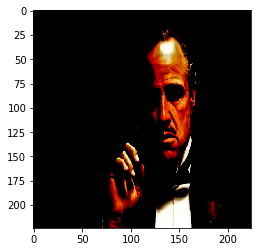

In [0]:
from matplotlib import pyplot
n = 10
print(X_train[n])
pyplot.imshow(X_train[n])

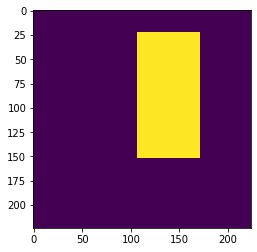

In [0]:
pyplot.imshow(masks[n])

## Create the model (10 marks)
- Add MobileNet as model with below parameter values
  - input_shape: IMAGE_HEIGHT, IMAGE_WIDTH, 3
  - include_top: False
  - alpha: 1.0
  - weights: "imagenet"
- Add UNET architecture layers
  - This is the trickiest part of the project, you need to research and implement it correctly

In [0]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Concatenate, UpSampling2D, Conv2D, Reshape
from tensorflow.keras.models import Model


def create_model(trainable=True):
    #### Add your code here ####
    model = MobileNet(input_shape = (224,224,3), alpha = 1.0, include_top = False, weights = "imagenet") 
    for layer in model.layers:
        layer.trainable = trainable

    # Add all the UNET layers here
    #### Add your code here ####

    Lay1 = model.get_layer('conv_pw_1_relu').output
    Lay2 = model.get_layer('conv_pw_3_relu').output
    Lay3 = model.get_layer('conv_pw_5_relu').output
    Lay4 = model.get_layer('conv_pw_11_relu').output
    Lay5 = model.get_layer('conv_pw_13_relu').output

    x = Concatenate()([UpSampling2D()(Lay5), Lay4])
    x = Concatenate()([UpSampling2D()(x), Lay3])
    x = Concatenate()([UpSampling2D()(x), Lay2])
    x = Concatenate()([UpSampling2D()(x), Lay1])
    x = Concatenate()([UpSampling2D()(x), model.input])

    x = Conv2D(1, kernel_size = 1, activation = 'sigmoid')(x)
    x = Reshape((224,224))(x)

    #### Add your code here ####
    return Model(inputs = model.input, outputs = x)

### Call the create_model function

In [0]:
# Give trainable=False as argument, if you want to freeze lower layers for fast training (but low accuracy)
model = create_model(True)

# Print summary
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
17227776/17225924 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112

### Define dice coefficient function (5 marks)
- Create a function to calculate dice coefficient


In [0]:
import tensorflow as tf
from tensorflow.keras.backend import epsilon
from tensorflow.keras.utils import Sequence
def dice_coefficient(y_true, y_pred):
    #### Add your code here ####
    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)
    #### Add your code here ####
    return numerator / (denominator + tf.keras.backend.epsilon())

### Define loss

In [0]:
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - log(dice_coefficient(y_true, y_pred) + epsilon())

### Compile the model (5 marks)
- Complie the model using below parameters
  - loss: use the loss function defined above
  - optimizers: use Adam optimizer
  - metrics: use dice_coefficient function defined above

In [0]:
#### Add your code here ####
from tensorflow.keras.optimizers import Adam

optimizer = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss=loss, optimizer=optimizer, metrics=[dice_coefficient])

### Define checkpoint and earlystopping

In [0]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="min", period=1)
stop = EarlyStopping(monitor="loss", patience=5, mode="min")
reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1, mode="min")

### Fit the model (5 marks)
- Fit the model using below parameters
  - epochs: you can decide
  - batch_size: 1
  - callbacks: checkpoint, reduce_lr, stop

In [0]:
#### Add your code here ####
model.fit(x= X_train, y = masks, batch_size = 1, epochs = 50, callbacks=[checkpoint, reduce_lr, stop])

Train on 409 samples
Epoch 1/50
408/409 [============================>.] - ETA: 0s - loss: 0.8052 - dice_coefficient: 0.6187
Epoch 00001: loss improved from inf to 0.80652, saving model to model-0.81.h5
409/409 [==============================] - 29s 71ms/sample - loss: 0.8065 - dice_coefficient: 0.6179
Epoch 2/50
408/409 [============================>.] - ETA: 0s - loss: 0.7059 - dice_coefficient: 0.6459
Epoch 00002: loss improved from 0.80652 to 0.70526, saving model to model-0.71.h5
409/409 [==============================] - 27s 65ms/sample - loss: 0.7053 - dice_coefficient: 0.6463
Epoch 3/50
408/409 [============================>.] - ETA: 0s - loss: 0.6772 - dice_coefficient: 0.6552
Epoch 00003: loss improved from 0.70526 to 0.67612, saving model to model-0.68.h5
409/409 [==============================] - 27s 65ms/sample - loss: 0.6761 - dice_coefficient: 0.6556
Epoch 4/50
408/409 [============================>.] - ETA: 0s - loss: 0.6564 - dice_coefficient: 0.6626
Epoch 00004: loss 

### Get the predicted mask for a sample image   (5 marks)

In [0]:
n = 10
sample_image = X_train[n]

#### Add your code here ####
z = np.random.randint(0,10,(224,224,3))
sample_image = np.expand_dims(z, axis=0)
prediction = model.predict(x=sample_image)

### Impose the mask on the image (5 marks)

In [0]:
#### Add your code here ####
prediction_10 = np.squeeze(prediction, axis=0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[1.49011612e-06 0.00000000e+00 0.00000000e+00 ... 1.78813934e-07
   0.00000000e+00 0.00000000e+00]
  [4.47034836e-07 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 1.19209290e-07 0.00000000e+00 ... 1.04904175e-05
   0.00000000e+00 0.00000000e+00]
  ...
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]]]


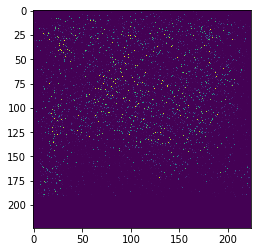

In [0]:
pyplot.imshow(prediction_10)
print(prediction)

#####On running 50 epochs the models loss has reduced from 0.81 to 0.35 and the dice co-efficient has increased from 0.62 to 0.81.
By running more iterations the loss will further reduce and the dice coefficient will increase and the models accuracy will considerably improve.
I have printed the result of the model after 50 epochs.